Exercise

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k

In [57]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
iris = load_iris()

In [59]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [60]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [61]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
df = df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns')
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'petal width (cm)')

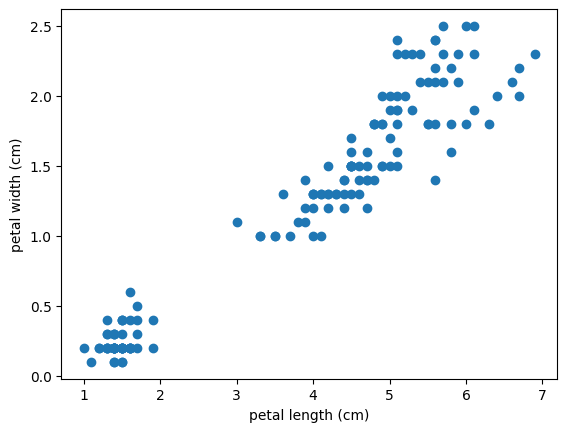

In [63]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [66]:
km = KMeans()
y_predict = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 7, 3, 2, 7, 2, 2, 3, 7, 3,
       3, 2, 3, 2, 5, 2, 3, 3, 2, 3, 3, 5, 3, 7, 2, 7, 2, 5, 3, 3, 3, 3,
       2, 2, 3, 3, 2, 7, 2, 2, 2, 2, 7, 2, 0, 5, 0, 6, 0, 4, 3, 4, 6, 0,
       5, 5, 0, 5, 5, 0, 6, 4, 4, 3, 0, 5, 4, 5, 0, 6, 5, 5, 0, 6, 6, 4,
       0, 5, 6, 0, 0, 6, 5, 0, 0, 5, 5, 0, 0, 5, 5, 5, 0, 5])

In [67]:
df['cluster'] = y_predict
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,5
146,5.0,1.9,5
147,5.2,2.0,5
148,5.4,2.3,0


In [68]:
km.cluster_centers_

array([[5.7       , 2.27647059],
       [1.462     , 0.246     ],
       [4.06666667, 1.24444444],
       [4.60416667, 1.44166667],
       [6.6       , 2.06666667],
       [5.03      , 1.91      ],
       [5.7375    , 1.7375    ],
       [3.41428571, 1.05714286]])

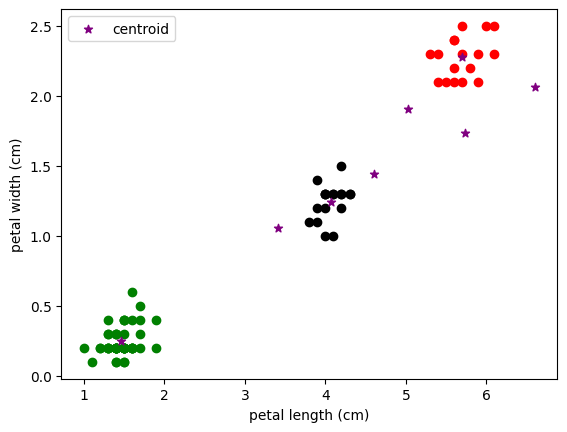

In [70]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label='centroid')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [72]:
scale = MinMaxScaler()

scale.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scale.transform(df[['petal length (cm)']])

scale.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scale.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


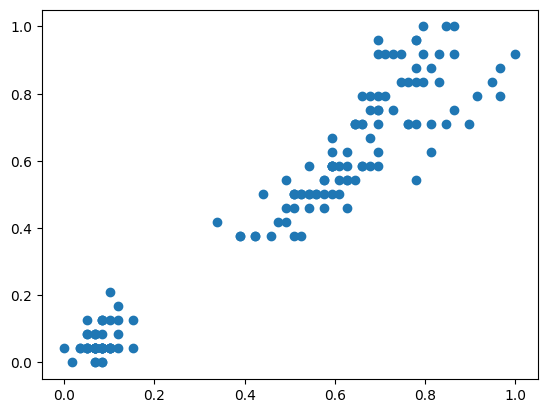

In [73]:
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])

In [74]:
km = KMeans(n_clusters=3)

y_predict = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
df['cluster'] = y_predict

In [76]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


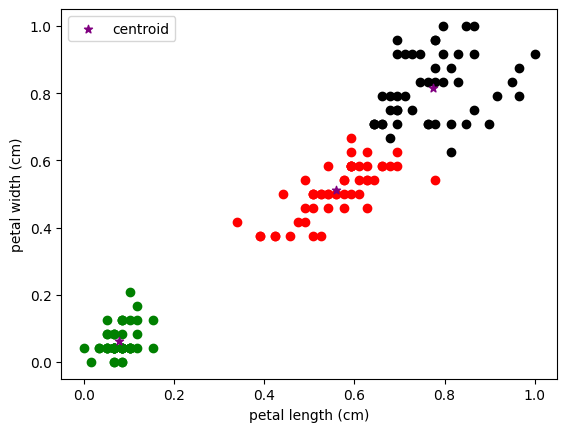

In [77]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label='centroid')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [78]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans()
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)


c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

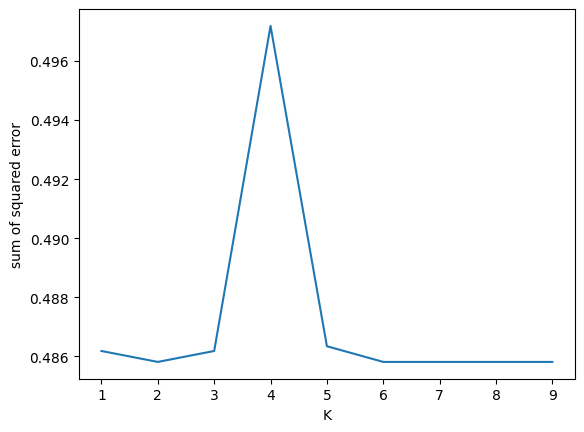

In [79]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)